<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "green">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, reklama5.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>What data you will be extracting and why?</li>
<li>Add a screenshot of the web-site that you will be scraping</li>



 add your answers here

Од сајтот што го избрав https://forum.crnobelo.com/ ќе извлекувам категории, наслови, времиња на објави И вкупен број мислења на темата поради тоа што сметам дека со овие податоци би можеле да направиме увид во тоа колку често корисниците објавуваат на сајтот и да видиме кои категории ги користат.

add your screenshot here

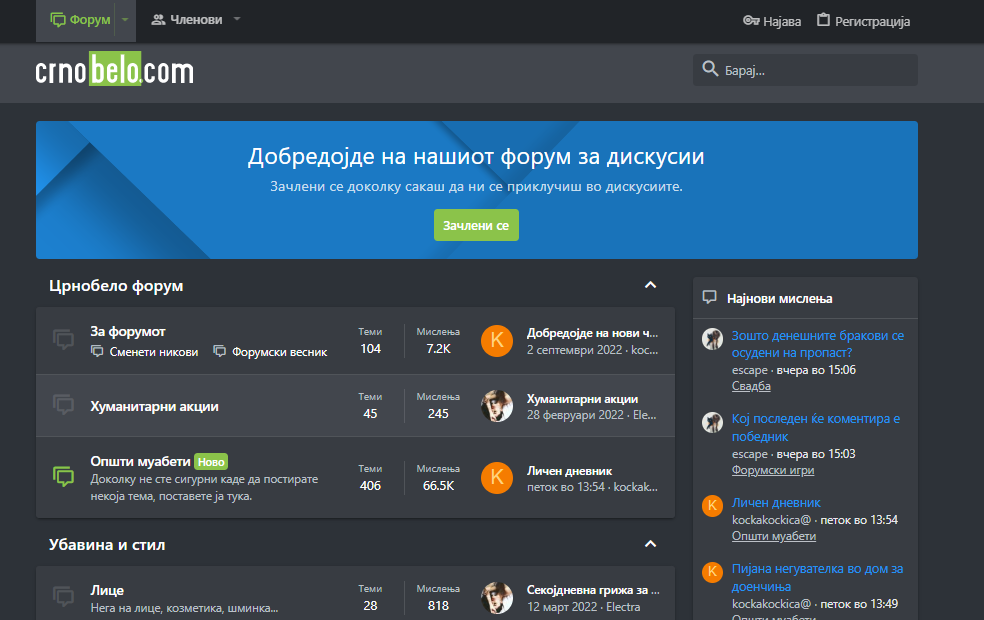

# <font color='Orange'>Requirements specified for Web Scraping</font>


Import all libraries and modules that you are going to use.

In [ ]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML

from datetime import datetime
from datetime import date

requests.packages.urllib3.disable_warnings()

import warnings
warnings.filterwarnings('ignore')

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> 

 **Fetch a website's content - send request**

In [ ]:
#add your code
snapshot_url = 'https://forum.crnobelo.com'

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [ ]:
#add your code
snapshot = requests.get(snapshot_url)
snapshot

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [ ]:
#add your code
raw_html = snapshot.text
soup = BeautifulSoup(raw_html,'html.parser')

**Print the HTML code that you get**

In [ ]:
#add your code
soup

<!DOCTYPE html>

<script type="text/javascript">
/* <![CDATA[ */
(function() {
  window.dm=window.dm||{AjaxData:[]};
  window.dm.AjaxEvent=function(et,d,ssid,ad){
    dm.AjaxData.push({et:et,d:d,ssid:ssid,ad:ad});
    window.DotMetricsObj&&DotMetricsObj.onAjaxDataUpdate();
  };
  var d=document,
  h=d.getElementsByTagName('head')[0],
  s=d.createElement('script');
  s.type='text/javascript';
  s.async=true;
  s.src=document.location.protocol + '//script.dotmetrics.net/door.js?id=2588';
  h.appendChild(s);
}());
/* ]]> */
</script>
<!-- Start Alexa Certify Javascript -->
<script type="text/javascript">
_atrk_opts = { atrk_acct:"vcm7h1awA400Ef", domain:"crnobelo.com",dynamic: true};
(function() { var as = document.createElement('script'); as.type = 'text/javascript'; as.async = true; as.src = "https://certify-js.alexametrics.com/atrk.js"; var s = document.getElementsByTagName('script')[0];s.parentNode.insertBefore(as, s); })();
</script>
<noscript><img alt="" height="1" src="https://cert

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

<font color='red'> You need to extract a minimum of four features (lists/columns) from the web site (example: titles, posting time, comments, likes, ...)</font>

`add your attributes here for building the dataset`

category, title, date, opinions in topic

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
#add your code
category = soup.select('.node-title')
HTML(category[0].prettify())

**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
#add your code
title = soup.select('.node-extra-title')
HTML(title[0].prettify())

In [ ]:
time = soup.find_all('time',{'class':'node-extra-date u-dt'})
time[0].text

'2 септември 2022'

In [ ]:
opinionInTopic = soup.find_all('div',{'class':'node-stats'})
opinionInTopic[0].select('dl:nth-of-type(2) > dd')[0].text

'7.2K'

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
#add your code
categories=[]
for i in range(0,len(category)):
  categories.append(category[i].select_one('a').text)

In [ ]:
titles=[]
for i in range(0,len(title)):
  titles.append(title[i].text)

In [ ]:
times=[]
for t in time:
  if 'во' in t.text:
    times.append(date.today().strftime('%d %m %Y'))
  else:
    times.append(t.text)

#format date
months=['',' јануари ',' февруари ',' март ',' април ',' мај ',' јуни ',' јули ',' август ',' септември ',' октомври ',' ноември ',' декември ']
for i in range(0,len(times)):
  if str.isdigit(times[i].split(' ')[1]):
    times[i] = times[i].split(' ')[0] + months[int(times[i].split(' ')[1])]+times[i].split(' ')[2]

In [ ]:
opinions=[]
for i in range(0,len(opinionInTopic)):
  opinions.append(opinionInTopic[i].select('dl:nth-of-type(2) > dd')[0].text)

**Print all lists that are containing the elements**

In [ ]:
#add your code
categories

['За форумот',
 'Хуманитарни акции',
 'Општи муабети',
 'Лице',
 'Коса',
 'Тело',
 'Мода и облека',
 'Здравје',
 'Спиење и сонови',
 'Фитнес и рекреација',
 'Здравје и состојба на духот',
 'Свадба',
 'Семејство',
 'Бременост',
 'Бебе',
 'Деца',
 'Дом',
 'Хоби',
 'Домашни миленици',
 'Патување',
 'Излегување и ноќен живот',
 'Образование',
 'Кариера',
 'Религија',
 'Политика и политички настани',
 'Литература и книжевност',
 'Дводимензионална уметност',
 'Колумни',
 'Поезија и проза',
 'Дизајни',
 'Скулптура и архитектура',
 'Наука и техника',
 'Готвење и рецепти',
 'Специјална исхрана',
 'Љубов и секс',
 'Авто-мото',
 'Спорт',
 'Музика',
 'ТВ',
 'Филм',
 'Досие X на форумот',
 'Форумски игри',
 'Хумор',
 'Историја',
 'Географија',
 'Философија',
 'Социологија',
 'Рисајкл Бин']

In [ ]:
titles

['Добредојде на нови членови',
 'Хуманитарни акции',
 'Личен дневник',
 'Секојдневна грижа за кожата (скинкер рутина)',
 'Новогодишни фризури',
 'Кога би можеле, кој дел од своето тело би го смениле?',
 'Онлајн шопинг',
 'Искуства со производи за слабеење (чаеви, таблети, прашоци)',
 'Несоница',
 'Зацврстено женско тело',
 'Социјална фобија, анксиозност и панични напади',
 'Зошто денешните бракови се осудени на пропаст?',
 'Што научивте од вашите родители?',
 'Породување',
 'Подароци за бебиња',
 'Колку деца би сакале да имате?',
 'Куќа или стан?',
 'Кое  е вашето хоби?',
 'Облекување на миленичиња',
 'Виза за Велика Британија',
 'Каде за Нова Година?',
 'Кои квалитети најмногу ги цените кај професорите?',
 'Огласи за вработување',
 'Дали Бог е незаинтересиран и бесчувствителен?',
 'Не за бугаризација!',
 'Барам книга',
 'Новогодишни украси',
 'Ваши еротски колумни',
 'Раскази - Хумор и Сатира',
 'Креации од отпадоци',
 'Скулптури пред кои Ви застанува здивот',
 'Каков мобилен телефон 

In [ ]:
times

['2 септември 2022',
 '28 февруари 2022',
 '25 октомври 2022',
 '12 март 2022',
 '24 август 2022',
 '23 јануари 2022',
 '1 март 2022',
 '30 септември 2022',
 '21 февруари 2022',
 '14 октомври 2022',
 '25 март 2022',
 '25 октомври 2022',
 '19 април 2022',
 '13 септември 2022',
 '5 јануари 2022',
 '13 септември 2022',
 '26 февруари 2022',
 '16 октомври 2022',
 '18 јануари 2022',
 '17 септември 2021',
 '30 декември 2021',
 '19 април 2022',
 '19 јули 2022',
 '21 август 2022',
 '21 септември 2022',
 '13 септември 2022',
 '10 декември 2021',
 '15 ноември 2021',
 '25 октомври 2022',
 '9 октомври 2021',
 '24 февруари 2021',
 '13 октомври 2022',
 '13 јули 2022',
 '5 февруари 2022',
 '15 октомври 2022',
 '19 септември 2021',
 '18 октомври 2022',
 '15 октомври 2022',
 '27 март 2022',
 '16 октомври 2022',
 '8 март 2022',
 '25 октомври 2022',
 '15 октомври 2022',
 '12 септември 2022',
 '21 јуни 2021',
 '2 ноември 2021',
 '29 мај 2022',
 '19 мај 2020']

In [ ]:
opinions

['7.2K',
 '245',
 '66.5K',
 '818',
 '764',
 '1.2K',
 '5.4K',
 '2K',
 '1.2K',
 '1.6K',
 '5.3K',
 '766',
 '2.2K',
 '745',
 '14',
 '1.3K',
 '886',
 '1.2K',
 '2.2K',
 '2.6K',
 '1.9K',
 '4.1K',
 '1.5K',
 '6.8K',
 '2.1K',
 '7K',
 '4.2K',
 '2K',
 '2.7K',
 '416',
 '528',
 '6.9K',
 '6K',
 '516',
 '23.4K',
 '1.3K',
 '11.1K',
 '33K',
 '5K',
 '5.6K',
 '4.4K',
 '85.3K',
 '14.9K',
 '849',
 '386',
 '3.1K',
 '2.6K',
 '4.4K']

**Check if all lists are the same size**

In [ ]:
#add your code
len(categories)

48

In [ ]:
len(titles)

48

In [ ]:
len(times)

48

In [ ]:
len(opinions)

48

In [ ]:
len(categories) == len(titles) == len(times) == len(opinions)

True

# <font color='Orange'>Create a Pandas DataFrame</font> 


**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
#add your code
matrix=[]
for i in range(0,len(categories)):
  node={'Категорија':categories[i], 'Наслов':titles[i],'Датум':times[i],'Мислења':opinions[i]}
  matrix.append(node)
matrix
df = pd.DataFrame(matrix)

**Print the dataset you obtain**

In [ ]:
#add your code
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/Lab1.csv')
df

,Категорија,Наслов,Датум,Мислења
0,За форумот,Добредојде на нови членови,2 септември 2022,7.2K
1,Хуманитарни акции,Хуманитарни акции,28 февруари 2022,245
2,Општи муабети,Личен дневник,25 октомври 2022,66.5K
3,Лице,Секојдневна грижа за кожата (скинкер рутина),12 март 2022,818
4,Коса,Новогодишни фризури,24 август 2022,764
5,Тело,"Кога би можеле, кој дел од своето тело би го с...",23 јануари 2022,1.2K
6,Мода и облека,Онлајн шопинг,1 март 2022,5.4K
7,Здравје,"Искуства со производи за слабеење (чаеви, табл...",30 септември 2022,2K
8,Спиење и сонови,Несоница,21 февруари 2022,1.2K
9,Фитнес и рекреација,Зацврстено женско тело,14 октомври 2022,1.6K


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# <font color = 'Green'>Advanced part</font>

<font color = 'orange'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font> 
For the extra task you will need to take a look of the Selenium library. Here is a quick intro to this library and what features it has.

Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.
 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/

Starting code id given below.

<font color ="red"> During the laboratory exercise, will be defined which side and what will need to be extracted using Selenium library</font>



In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://forum.crnobelo.com")
print(wd.page_source)  # results
#divs = wd.find_element(By.TAG_NAME, 'div')

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.c

<html id="XF" lang="mk-MK" dir="LTR" style="font-size: 62.5%;" data-app="public" data-template="forum_list" data-container-key="" data-content-key="" data-logged-in="false" data-cookie-prefix="xf_" data-csrf="1666717413,b2f675780be647114485539d9f82c7e0" class="has-js template-forum_list  uix_page--fixed uix_hasWelcomeSection uix_hasSectionLinks  uix_hasPageAction has-no-touchevents has-passiveeventlisteners has-no-hiddenscroll has-os-linux has-browser-chrome" data-run-jobs=""><head><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-WGV6WVEDB8&amp;l=dataLayer&amp;cx=c"></script><script type="text/javascript" async="" src="https://certify-js.alexametrics.com/atrk.js"></script><script type="text/javascript">
/* <![CDATA[ */
(function() {
  window.dm=window.dm||{AjaxData:[]};
  window.dm.AjaxEvent=function(et,d,ssid,ad){
    dm.AjaxData.push({et:et,d:

In [ ]:
wd

In [ ]:
#wd.find_elements('class name','node-title')
#wd.find_element('class name','node-title').text 
#wd.find_elements('css selector','div.node-main.js-nodeMain > h3.node-title > a')
#wd.find_elements('css selector','div.node-main.js-nodeMain:nth-child(1) > a')

#if I modify the list or need the index
selList = wd.find_elements('class name','node-title')
l = []
for i in range(0,len(selList)):
  l.append(selList[i].text)
l

#if I dont modify the list
li = []
for elem in selList:
  li.append(elem.text)
li

#shortest 
l2 = [elem.text for elem in selList]
